# Ejercicio 1 - Dataset Hawks

El archivo Hawks.csv contiene mediciones de casi 900 aves de tres especies diferentes. Los datos registrados
son los siguientes:

| Campo    | Descripción                                                                 |
|----------|-----------------------------------------------------------------------------|
| Especies | Etiqueta de clase: CH (Cooper), RT (Colirrojo), SS (Rastrero)               |
| Año      | Año de avistamiento                                                         |
| Hallux   | Medida en mm del hallux (dedo posterior)                                    |
| Ala      | Longitud en mm de la pluma más larga del ala                                |
| Peso     | Peso en gramos                                                              |
| Cola     | Longitud de la cola en mm                                                   |


In [1]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos
import numpy as np
import sys
source_path='../../Fuentes'
sys.path.append(source_path)

# importa perceptron de Laura en la carpeta Colab definida con FUENTES_DIR
from ClassPerceptron import Perceptron

data_path='./Data/'

file_name = data_path + 'hawks.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(file_name, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# El archivo tiene una sola columna con todos los datos separados por ';'
# Separamos los datos en columnas usando el separador ';'
data = pd.read_csv(file_name, sep=';')

# Recupera todas las columnas salvo primera (Año) y última (Hallux)
X = np.array(data.iloc[:, 2:-1])
T_raw = np.array(data.iloc[:, 1])  # Especie

display(data)

display(data)

,Ano,Especie,Ala,Peso,Cola,Hallux
0,1994,RT,2770,9400,218,304
1,1997,RT,3730,9140,221,304
2,2000,RT,3790,10000,217,322
3,2000,RT,3920,11850,229,330
4,2002,RT,3650,11250,213,293
...,...,...,...,...,...,...
888,2003,RT,3620,8400,206,261
889,2003,SS,1900,2000,157,150
890,2003,SS,1970,1850,157,156
891,2003,RT,3600,13250,224,306


,Ano,Especie,Ala,Peso,Cola,Hallux
0,1994,RT,2770,9400,218,304
1,1997,RT,3730,9140,221,304
2,2000,RT,3790,10000,217,322
3,2000,RT,3920,11850,229,330
4,2002,RT,3650,11250,213,293
...,...,...,...,...,...,...
888,2003,RT,3620,8400,206,261
889,2003,SS,1900,2000,157,150
890,2003,SS,1970,1850,157,156
891,2003,RT,3600,13250,224,306


## Inciso A

## Inciso A

Calcule la correlación lineal entre los atributos Ala y Cola. Indique la intensidad de la correlación (no hay/debil/fuerte) y el tipo (positiva/negativa).

| Atributo   | Valor     |
|:----------:|:---------:|
| Correlación| 0.899888  |
| Intensidad | Fuerte    |
| Tipo       | Positiva  |

In [2]:
display(data[['Ala', 'Cola']].corr())

,Ala,Cola
Ala,1.000000,0.899888
Cola,0.899888,1.000000


## Inciso B

Complete el cuadro con los valores del atributo Hallux antes y despues de normalizarlos utilizando media y desvio

|     Medida      |   Sin Normalizar   |      Normalizado       |
| :-------------: | :----------------: | :--------------------: |
|      Media      | 291.77155655095186 | -3.182722220649945e-17 |
|     Desvio      | 321.32404993168916 |          1.0           |
|     Minimo      |         95         |  -0.6123773075584721   |
|       Q1        |       152.0        |  -0.43498629057073734  |
|       Q2        |       295.0        |  0.01004731345112351   |
|       Q3        |       315.0        |  0.07228977555208307   |
|       RIC       |       163.0        |   0.5072760661228204   |
|     Maximo      |        3414        |   9.716759278095767    |
| Bigote Inferior |       -92.5        |  -1.1959003897549678   |
| Bigote Superior |       559.5        |   0.8332038747363136   |



In [3]:
hallux=data['Hallux']

mean = hallux.mean()
std=hallux.std()
min=hallux.min()
q1=hallux.quantile(.25)
q2=hallux.quantile(.5)
q3=hallux.quantile(.75)
ric=q3-q1
max=hallux.max()
bigote_inferior = q1 - 1.5 * ric
bigote_superior = q3 + 1.5 * ric

print("Media:", mean)
print("Desvio:", std)
print("Minimo:", min)
print("Q1:", q1)
print("Q2:", q2)
print("Q3:", q3)
print("RIC:", ric)
print("Maximo:", max)
print("Bigote Inferior:", bigote_inferior)
print("Bigote Superior:", bigote_superior)

hallux_std=(hallux-mean)/std


mean = hallux_std.mean()
std=hallux_std.std()
min=hallux_std.min()
q1=hallux_std.quantile(.25)
q2=hallux_std.quantile(.5)
q3=hallux_std.quantile(.75)
ric=q3-q1
max=hallux_std.max()
bigote_inferior = q1 - 1.5 * ric
bigote_superior = q3 + 1.5 * ric

print("Media (normalizado):", mean)
print("Desvio (normalizado):", std)
print("Minimo (normalizado):", min)
print("Q1 (normalizado):", q1)
print("Q2 (normalizado):", q2)
print("Q3 (normalizado):", q3)
print("RIC (normalizado):", ric)
print("Maximo (normalizado):", max)
print("Bigote Inferior (normalizado):", bigote_inferior)
print("Bigote Superior (normalizado):", bigote_superior)

Media: 291.77155655095186
Desvio: 321.32404993168916
Minimo: 95
Q1: 152.0
Q2: 295.0
Q3: 315.0
RIC: 163.0
Maximo: 3414
Bigote Inferior: -92.5
Bigote Superior: 559.5
Media (normalizado): -3.182722220649945e-17
Desvio (normalizado): 1.0
Minimo (normalizado): -0.6123773075584721
Q1 (normalizado): -0.43498629057073734
Q2 (normalizado): 0.01004731345112351
Q3 (normalizado): 0.07228977555208307
RIC (normalizado): 0.5072760661228204
Maximo (normalizado): 9.716759278095767
Bigote Inferior (normalizado): -1.1959003897549678
Bigote Superior (normalizado): 0.8332038747363136


Compare los valores obtenidos e indique el valor de verdad de las siguientes afirmaciones:

* El valor de Q2 normalizado permite afirmar que la media y la mediana tienen valores cercanos. *True*
* El máximo valor de Hallux se encuentra a más de 9 desvíos por encima de la media. *True*
* Un hallux que mida más de 600 mm es considerado atípico extremo. *False, Leve*
* Un valor normalizado del atributo “hallux” de 2 se considerará un valor atípico extremo. *True*
* En un gavilán es atípico que su hallux mida menos de 100 mm. *True*

# Ejercicio 2 - Dataset globos

El archivo `globos.csv` contiene el registro de 16 intentos para inflar globos. Los atributos registrados fueron:

- **Color del globo**
- **Tamaño**
- **¿Se estira?**
- **Edad** (¿Adulto o Niño?)
- **¿Pudo ser inflado?**

En cada registro se anotó si el globo pudo ser inflado o no.

**Numerice los atributos de la siguiente forma:**

- **Color:** 1 si es rojo, 0 si es amarillo
- **¿Se estira?:** 1 para "Sí", 0 para "No"
- **Edad:** 1 si es adulto, 0 si es nene
- **Tamaño:** 0 si es chico, 0.5 si es mediano, 1 si es grande

In [4]:
# para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import pandas as pd
import chardet           # para detectar la codificación de texto en archivos
import numpy as np
import sys
source_path = '../../Fuentes'
sys.path.append(source_path)

from ClassPerceptron import Perceptron
# importa perceptron de Laura en la carpeta Colab definida con FUENTES_DIR

data_path = './Data/'

file_name = data_path + 'globos.csv'  # archivo de hojas

# -- detectando la codificación de caracteres usada ----
with open(file_name, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# El archivo tiene una sola columna con todos los datos separados por ';'
# Separamos los datos en columnas usando el separador ';'
data = pd.read_csv(file_name)

data['Color']=data['Color'].replace({'Rojo':1, 'Amarillo':0})
data['Se_estira?']=data['Se_estira?'].replace({'Si':1, 'No':0})
data['Edad']=data['Edad'].replace({'Adulto':1, 'Nene':0})
data['Tamanio']=data['Tamanio'].replace({'Grande':1, 'Mediano':0.5, 'Chico':0})
data['Inflado?']=data['Inflado?'].replace({'Si':1,'No':0})


X = np.array(data.iloc[:, 0:-1])
T_raw = np.array(data.iloc[:, -1]) 

display(X, T_raw)

/tmp/ipykernel_28122/1131383583.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Color']=data['Color'].replace({'Rojo':1, 'Amarillo':0})
/tmp/ipykernel_28122/1131383583.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Se_estira?']=data['Se_estira?'].replace({'Si':1, 'No':0})
/tmp/ipykernel_28122/1131383583.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the 

array([[0. , 0. , 1. , 1. ],
       [0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0. ],
       [0. , 1. , 1. , 1. ],
       [0. , 1. , 1. , 0. ],
       [0. , 0.5, 0. , 1. ],
       [0. , 0.5, 0. , 0. ],
       [1. , 0. , 1. , 1. ],
       [1. , 0. , 1. , 0. ],
       [1. , 0.5, 0. , 1. ],
       [1. , 0.5, 0. , 0. ],
       [1. , 1. , 1. , 1. ],
       [1. , 1. , 1. , 0. ],
       [1. , 1. , 0. , 1. ],
       [1. , 1. , 0. , 0. ]])

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

## Inciso A

Indique cuáles de los siguientes perceptrones pueden clasificar correctamente todos los ejemplos
normalizados del archivo Globos.csv

Configuración w(Color) w(Tamanio) w(Se_estira?) w(Edad) b

| Perceptrón | w(Color) | w(Tamanio) | w(Se_estira?) | w(Edad) | b      | ¿Clasifica todos? |
|:----------:|:--------:|:----------:|:-------------:|:-------:|:------:|:-----------------:|
|     1      |  0.050   |   0.006    |   -0.068      | -0.047  | 0.005  |        No         |
|     2      | -0.494   |  -0.003    |   0.722       |  0.489  | -0.4943|        No         |
|     3      |  0.06    |   0.004    |   0.1278      |  0.021  | -0.1132|        No         |
|     4      |  0.296   |   0.026    |   -0.576      | -0.287  | 0.371  |        No         |
|     5      |  0.994   |   0.006    |   -1.466      | -0.989  | 0.988  |        No         |

In [5]:
def mi_perceptron(X, weight, b):
  # Calcula la salida del perceptrón (función escalón)
  return (np.dot(X, weight) - b > 0).astype(int)

W = np.array([
  [0.050, 0.006, -0.068, -0.047, 0.005],
  [-0.494, -0.003, 0.722, 0.489, -0.4943],
  [0.06, 0.004, 0.1278, 0.021, -0.1132],
  [0.296, 0.026, -0.576, -0.287, 0.371],
  [0.994, 0.006, -1.466, -0.989, 0.988]
])

b = W[:, -1]   # Última columna (bias)
W = W[:, :-1]       # Quitar la última columna (solo pesos)

for i in range(W.shape[0]):
  Y = mi_perceptron(X, W[i], b[i])
  aciertos = sum(Y == T_raw)
  print(f"Aciertos Perceptron {i+1}: {aciertos}")
  print("%% de aciertos = %.2f %%" % (100 * aciertos / X.shape[0]))


Aciertos Perceptron 1: 6
% de aciertos = 37.50 %
Aciertos Perceptron 2: 8
% de aciertos = 50.00 %
Aciertos Perceptron 3: 6
% de aciertos = 37.50 %
Aciertos Perceptron 4: 10
% de aciertos = 62.50 %
Aciertos Perceptron 5: 8
% de aciertos = 50.00 %


## Inciso B

El que peor se desempeña es el perceptron 1 y 3, ya que tienen el menor porcentaje de aciertos

# Ejercicio 3

La Tabla 1 muestra información correspondiente de pacientes para determinar si deben realizarse un
examen médico en función de su edad, altura y riesgo médico.

| Edad | Riesgo | Examen |
| :--: | :----: | :----: |
|  55  |  Alto  |   Si   |
|  56  | Medio  |   No   |
|  58  | Medio  |   Si   |
|  56  |  Bajo  |   No   |
|  59  |  Bajo  |   No   |
|  57  | Medio  |   Si   |
|  60  |  Bajo  |   Si   |
|  53  |  Alto  |   No   |
|  59  | Medio  |   Si   |

Donde:  
- **EDAD** es un atributo numérico que indica la edad del paciente.  
- **RIESGO** es el nivel de riesgo del paciente.  
- **EXAMEN** indica si debe realizarse un examen extra.  

Para transformar el atributo nominal **RIESGO** en uno numérico se lo numerizó de la siguiente forma:  
**BAJO = 1**, **MEDIO = 2**, **ALTO = 3**.


In [6]:
data = pd.DataFrame({
  'Edad': [55, 56, 58, 56, 59, 57, 60, 53, 59],
  'Riesgo': [3, 2, 2, 1, 1, 2, 1, 3, 2],  # Alto=3, Medio=2, Bajo=1
  'Examen': [1, 0, 1, 0, 0, 1, 1, 0, 1]   # Si=1, No=0
})
display(data)

,Edad,Riesgo,Examen
0,55,3,1
1,56,2,0
2,58,2,1
3,56,1,0
4,59,1,0
5,57,2,1
6,60,1,1
7,53,3,0
8,59,2,1


## Inciso A

Luego de la numerización se calculó el coeficiente de correlación lineal entre los atributos EDAD y RIESGO
y se obtuvo como resultado -0.71. ¿Cómo debe interpretarse este valor?

In [7]:
display(data[['Riesgo','Edad']].corr())

,Riesgo,Edad
Riesgo,1.000000,-0.715097
Edad,-0.715097,1.000000


Se debe interpretar como que tiene una correlación débil, pues se encuentra entre 0.5 y 0.8

## Inciso B

Luego de numerizar el atributo RIESGO y de normalizar los atributos de manera lineal entre 0 y 1, los ejemplos fueron utilizados para entrenar un perceptrón capaz de predecir correctamente el atributo EXAMEN. Los pesos obtenidos fueron los siguientes:  
**W(EDAD) = 0.0807**  
**W(RIESGO) = 0.074**  
**Sesgo o bias = -0.0742**

¿Cuál será la respuesta del perceptrón para los siguientes valores?

- **(EDAD, RIESGO) = (50, BAJO), (51, MEDIO), (54, ALTO)**

In [8]:
def mi_perceptron(X, weight, b):
  # Calcula la salida del perceptrón (función escalón)
  return (np.dot(X, weight) - b > 0).astype(int)

W=[0.0807, 0.074]
b=-0.0742
X=[(50,1), (51,2),(54,3)]

Y=mi_perceptron(X, W, b)

display(Y)

array([1, 1, 1])

# Ejercicio 5 - Dataset Drugs

Se busca predecir si el tipo de fármaco que se debe administrar a un paciente afectado de rinitis alérgica es el habitual o no. Se dispone de información correspondiente a las historias clínicas de pacientes atendidos previamente. Las variables relevadas son las siguientes:

| Variable     | Descripción                                         |
|--------------|-----------------------------------------------------|
| Age          | Edad                                                |
| Sex          | Sexo                                                |
| BP           | Presión sanguínea                                   |
| Cholesterol  | Nivel de colesterol                                 |
| Na           | Nivel de sodio en la sangre                         |
| K            | Nivel de potasio en la sangre                       |
| Class        | Fármaco suministrado (DrugA, DrugB, DrugC, DrugX, DrugY) |


## Inciso A

Utilice el archivo drug_train.csv para entrenar un perceptrón que sea capaz de predecir si el tipo de
fármaco que se debe administrar a un paciente afectado de rinitis alérgica es el habitual (suministro de
DrugY) o no.

In [9]:
data=pd.read_csv(data_path+'drugs_train.csv')

data['BP']=data['BP'].replace({'LOW':0, 'NORMAL':1, 'HIGH':2})
data['Cholesterol']=data['Cholesterol'].replace({'LOW':0, 'NORMAL':1, 'HIGH':2})
data=pd.get_dummies(data,columns=['Sex', 'Drug'])
data = data.astype(int)

X = np.array(data.iloc[:, 0:-1])
T_raw = np.array(data.iloc[:, -1]) 

T = np.where(T_raw == 0, -1, 1)
stds = X.std(axis=0)
X = (X - X.mean(axis=0)) / np.where(stds == 0, 1, stds)

display(data)

/tmp/ipykernel_28122/590278532.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['BP']=data['BP'].replace({'LOW':0, 'NORMAL':1, 'HIGH':2})
/tmp/ipykernel_28122/590278532.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Cholesterol']=data['Cholesterol'].replace({'LOW':0, 'NORMAL':1, 'HIGH':2})


,Age,BP,Cholesterol,Na,K,Sex_F,Sex_M,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX,Drug_drugY
0,16,0,2,0,0,0,1,0,0,1,0,0
1,42,2,2,0,0,1,0,0,0,0,0,1
2,33,0,2,0,0,1,0,0,0,0,0,1
3,47,0,2,0,0,0,1,0,0,1,0,0
4,56,2,2,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
155,72,0,2,0,0,0,1,0,0,0,0,1
156,19,2,1,0,0,1,0,0,0,0,0,1
157,64,0,1,0,0,1,0,0,0,0,0,1
158,64,2,1,0,0,0,1,0,0,0,0,1


In [10]:

perceptron=Perceptron(alpha=0.75, n_iter=30)

perceptron.fit(X, T)

Y=perceptron.predict(X)
display(Y)
aciertos=sum(Y==T_raw)
print('Aciertos: ', aciertos)

print('Porcentaje de aciertos: %.2f %%' % (100 * aciertos / len(T_raw)))

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1])

Aciertos:  144
Porcentaje de aciertos: 90.00 %


## Inciso B

Luego utilice el archivo drug_test.csv para medir la calidad del modelo.

In [11]:
data=pd.read_csv(data_path+'drugs_test.csv')


data['BP']=data['BP'].replace({'LOW':0, 'NORMAL':1, 'HIGH':2})
data['Cholesterol']=data['Cholesterol'].replace({'LOW':0, 'NORMAL':1, 'HIGH':2})
data=pd.get_dummies(data,columns=['Sex', 'Drug'])
data = data.astype(int)

display(data)

X = np.array(data.iloc[:, 0:-1])
T_raw = np.array(data.iloc[:, -1]) 

T = np.where(T_raw == 0, -1, 1)
stds = X.std(axis=0)
X = (X - X.mean(axis=0)) / np.where(stds == 0, 1, stds)

/tmp/ipykernel_28122/3514455224.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['BP']=data['BP'].replace({'LOW':0, 'NORMAL':1, 'HIGH':2})
/tmp/ipykernel_28122/3514455224.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Cholesterol']=data['Cholesterol'].replace({'LOW':0, 'NORMAL':1, 'HIGH':2})


,Age,BP,Cholesterol,Na,K,Sex_F,Sex_M,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX,Drug_drugY
0,47,0,2,0,0,1,0,0,0,1,0,0
1,49,0,1,0,0,0,1,0,0,0,1,0
2,50,2,2,0,0,0,1,1,0,0,0,0
3,32,1,2,0,0,1,0,0,0,0,1,0
4,40,2,2,0,0,0,1,0,0,0,0,1
5,63,1,2,0,0,0,1,0,0,0,0,1
6,46,2,2,0,0,1,0,0,0,0,0,1
7,58,0,2,0,0,1,0,0,0,0,0,1
8,31,2,1,0,0,0,1,0,0,0,0,1
9,66,2,2,0,0,0,1,0,0,0,0,1


In [12]:
Y=perceptron.predict(X)
display(Y)
aciertos=sum(Y==T_raw)
print('Aciertos: ', aciertos)

print('Porcentaje de aciertos: %.2f %%' % (100 * aciertos / len(T_raw)))

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

Aciertos:  40
Porcentaje de aciertos: 100.00 %


# Ejercicio 5 - Dataset Semillas



El archivo `semillas.csv` contiene información de granos que pertenecen a tres variedades diferentes de trigo: **Kama**, **Rosa** y **Canadiense**. El total es de **210 ejemplos** a razón de 70 ejemplos para cada tipo de grano, seleccionados al azar para el experimento.

La información registrada corresponde al resultado de la visualización de alta calidad de la estructura interna del núcleo efectuada utilizando una técnica de rayos X blandos. Este tipo de estudio no es destructivo y es considerablemente más económico que otras técnicas de imagen más sofisticadas como la microscopía de barrido o la tecnología láser. Las imágenes se grabaron en placas KODAK de rayos x de 13x18 cm. Los estudios se realizaron utilizando granos de trigo cosechados combinados procedentes de campos experimentales, explorados en el Instituto de Agrofísica de la Academia Polaca de Ciencias en Lublin.

Para construir los datos, se midieron **siete parámetros geométricos** de cada grano de trigo:

- **Área (A)**
- **Perímetro (P)**
- **Compacidad (C)** = 4 × π × A / P²
- **Longitud del núcleo**
- **Ancho del núcleo**
- **Coeficiente de asimetría**
- **Longitud del surco del núcleo**


El tipo 2 es el que puede detectar

In [15]:
data=pd.read_csv(data_path + 'semillas.csv')


X = data.iloc[:, 0:-1]
T_raw = data.iloc[:, -1]

X=(X-X.mean())/X.std()
T_1=(T_raw=='Tipo1')*1
T_2=(T_raw=='Tipo2')*1
T_3=(T_raw=='Tipo3')*1

X=np.array(X)
T_1=np.array(T_1)
T_2=np.array(T_2)
T_3=np.array(T_3)

perceptron1=Perceptron(0.05,200)
perceptron1.fit(X,T_1)
Y_1=perceptron1.predict(X)

perceptron2=Perceptron(0.05,200)
perceptron2.fit(X,T_2)
Y_2=perceptron2.predict(X)

perceptron3=Perceptron(0.05,200)
perceptron3.fit(X,T_3)
Y_3=perceptron3.predict(X)

aciertos1 = np.sum(Y_1 == T_1)
aciertos2 = np.sum(Y_2 == T_2)
aciertos3 = np.sum(Y_3 == T_3)

print(f"Aciertos perceptrón Tipo1: {aciertos1}")
print(f"Aciertos perceptrón Tipo2: {aciertos2}")
print(f"Aciertos perceptrón Tipo3: {aciertos3}")

Aciertos perceptrón Tipo1: 191
Aciertos perceptrón Tipo2: 210
Aciertos perceptrón Tipo3: 201


# Ejercicio 6 

El archivo zoo.csv contiene información de 101 animales caracterizados por los siguientes atributos

- **A1. Nombre del animal**
- **A2. Tiene Pelo**
- **A3. Plumas**
- **A4. Huevos**
- **A5. Leche**
- **A6. Vuela**
- **A7. Acuático**
- **A8. Depredador**
- **A9. Dentado**
- **A10. Vertebrado**
- **A11. Branquias**
- **A12. Venenoso**
- **A13. Aletas**
- **A14. Patas**
- **A15. Cola**
- **A16. Domestico**
- **A17. Tamaño gato**
- **A18. Clase**

Salvo los atributos A1 y A18 que contienen texto y el A14 que contiene el número de patas del animal, el resto toma el valor 1 si el animal posee la característica y 0 si no. Hay 7 valores de clase posible (atributo A18): mamífero, ave, pez, invertebrado, insecto, reptil y anfibio.

In [23]:
data=pd.read_csv(data_path + 'zoo.csv', encoding="latin1")

X=np.array(data.iloc[:,1:-1])
T_raw=data.iloc[:, -1]


## Inciso A

Realice un gráfico que visualice de la cantidad de ejemplos por cada valor del atributo **clase** y analice que tipos de problema podrían surgir al entrenar un modelo para clasificación.

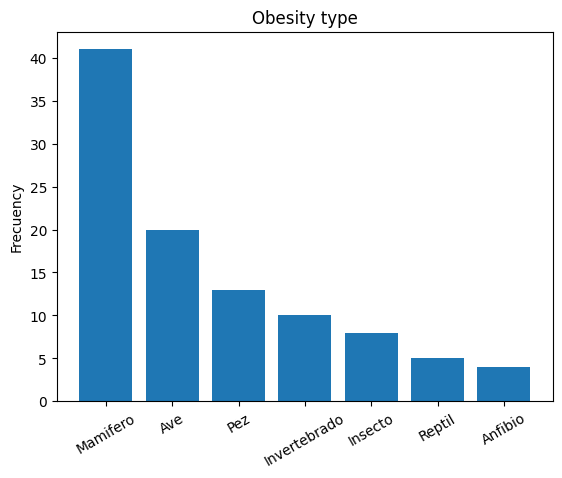

In [24]:
import matplotlib.pyplot as plt

plt.figure()
N = len(T_raw.value_counts())
plt.bar(np.arange( N ), T_raw.value_counts())  # Gráfico de T_raw.value_counts()
plt.title('Obesity type')      # Colocamos el título
plt.ylabel('Frecuency')
# Colocamos las etiquetas del eje x con rotación para evitar superposición
plt.xticks(np.arange( N ), T_raw.value_counts().index, rotation=30)
plt.show()

Hay un claro desbalance entre los ejemplos, lo que puede llevar a que responda con sesgo.

## Inciso B

Utilice todos los ejemplos para entrenar un perceptrón que sea capaz de reconocer si un animal es un
mamífero. Entrene varias veces si es necesario y verifique que funcione correctamente.

In [ ]:
perceptron=Perceptron(0.05, 10)
T_mamifero=np.array((T_raw=='Mamifero')*1)
perceptron.fit(X,T_mamifero)
Y=perceptron.predict(X)

aciertos = np.sum(Y == T_mamifero)
print(f"Aciertos: {aciertos}")
print("Porcentaje de aciertos: %.2f %%" % (100 * aciertos / len(T_mamifero)))


array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0])

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0])

Aciertos: 101
Porcentaje de aciertos: 100.00 %


## Inciso C

Observe los pesos del perceptrón entrenado en a) ¿Puede determinar cuáles son las características más
relevantes para decidir si se trata de un mamífero o no? Realice varias ejecuciones independientes y
observe si las características más relevantes siguen siendo las mismas.

In [34]:
display(perceptron.w_)

array([ 4.01751255e-01, -4.88674147e-02, -5.80751348e-01,  5.91776613e-01,
        5.88361502e-04, -1.17802102e-01, -3.25718763e-01,  7.12254570e-01,
        2.80634145e-01, -4.51778279e-02, -2.19704273e-01, -1.33513673e-01,
       -5.75644808e-02,  8.42271992e-02,  1.38285775e-01,  5.12266841e-01])

# Ejercicio 7

El archivo automobile_simple.csv contiene 11 atributos de automóviles de un total de 205 registros. Es una versión modificada y simplificada del dataset disponible en el repositorio UCI  
https://archive.ics.uci.edu/ml/datasets/Automobile. La siguiente tabla contiene una breve descripción de los atributos que contiene el archivo y caracterizan a cada vehículo.

| Atributo        | Descripción                                                                 |
|-----------------|-----------------------------------------------------------------------------|
| make            | Marca: alfa-romero, audi, bmw, chevrolet…                                   |
| fuel-type       | Tipo de combustible: diesel, gasolina.                                      |
| num-of-doors    | Número de puertas: cuatro, dos.                                             |
| body-style      | Tipo de carrocería: techo duro, wagon, sedán, hatchback, descapotable.      |
| curb-weight     | Peso en vacío: numérico de 1488 a 4066.                                     |
| engine-size     | Tamaño del motor: numérico de 61 a 326.                                     |
| horsepower      | Potencia: numérico de 48 a 288.                                             |
| city-mpg        | Rendimiento en ciudad (en millas por galón): numérico de 13 a 49.           |
| highway-mpg     | Rendimiento en ruta (en millas por galón): numérico de 16 a 54.             |
| price           | Precio en USD: numérico de 5118 a 45400.                                    |
| volume          | Volumen del vehículo (alto x ancho x alto).                                 |
| eco-rating      | Evaluación de la sostenibilidad ambiental del vehículo basado en su volumen, peso, consumo de combustible y

## Inciso A

Para cada atributo indique si es Discreto, Continuo, Nominal u Ordinal

| Atributo        | Tipo de Variable         |
|-----------------|-------------------------|
| make            | Nominal                 |
| fuel-type       | Nominal                 |
| num-of-doors    | Discreto / Ordinal      |
| body-style      | Nominal                 |
| curb-weight     | Continuo                |
| engine-size     | Continuo                |
| horsepower      | Continuo                |
| city-mpg        | Continuo                |